In [1]:
import sys
print(sys.version)

3.7.13 (default, Mar 29 2022, 02:18:16) 
[GCC 7.5.0]


In [ ]:
import os

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
    os.system("git clone https://github.com/DominikHuss/AITech-forecasting.git; \
               cd AITech-forecasting; \
               git checkout dev; \
               pip install pystan==2.19.1.1 prophet")

In [7]:
import pandas as pd
import prophet

In [11]:
DATA_PATH = f'{"AITech-forecasting" if IN_COLAB else "."}/data'

df = pd.read_csv(f'{DATA_PATH}/AITech_1.csv')
df.head()

,ds,y
0,10/12/2007,9.590761
1,11/12/2007,8.519590
2,12/12/2007,8.183677
3,13/12/2007,8.072467
4,14/12/2007,7.893572


In [13]:
m = prophet.Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.1192
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6957.76    0.00320998       207.552           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6960.38    0.00128985       106.915      0.2691      0.2691      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201        6960.4   0.000111841       146.129   9.541e-07       0.001      286  LS failed, Hessian reset 
     265       6960.58   5.89254e-07       57.8136           1           1      372   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-11-27
3266,2017-11-28
3267,2017-11-29
3268,2017-11-30
3269,2017-12-01


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-11-27,7.696806,6.809351,8.567889
3266,2017-11-28,7.607261,6.711256,8.518208
3267,2017-11-29,7.474132,6.582475,8.394426
3268,2017-11-30,7.469672,6.541093,8.366288
3269,2017-12-01,7.503922,6.647461,8.332546


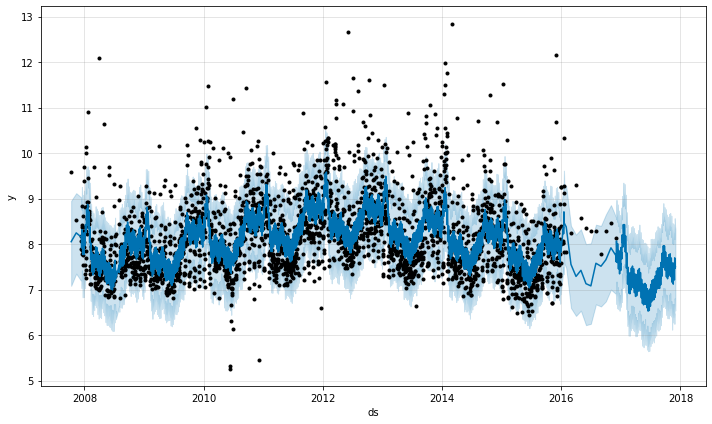

In [18]:
fig1 = m.plot(forecast)

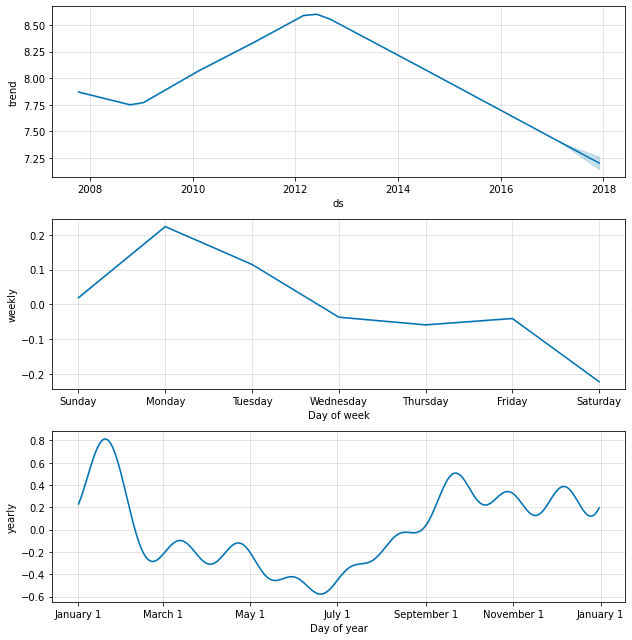

In [17]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)